 TASK:This dataset designed to understand the factors that lead a person will work for the company(leaving current job) , by model(s) that uses the current credentials/demographics/experience to predict the probability of a candidate to look for a new job or will work for the company.

In [1]:
### Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### loading the data
data=pd.read_csv('aug_train.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
data.shape

(19158, 14)

In [4]:
### Unique values in each column
data.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

#### Exploratory Data Analysis

In [5]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


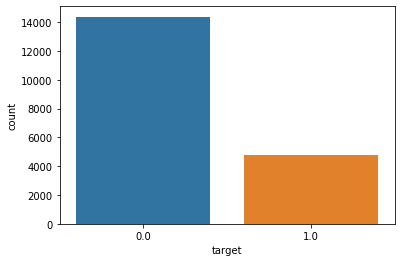

In [6]:
import seaborn as sns
sns.countplot(data['target'])

Explanation:From the ablove plot we can see that the classes are imbalanced so we need to use class_weight=balanced.

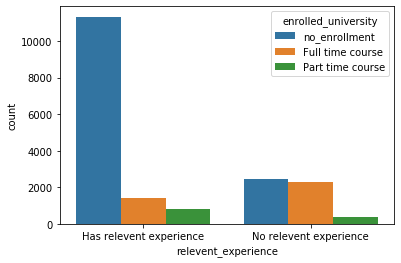

In [7]:
sns.countplot(x=data['relevent_experience'],hue=data.enrolled_university)

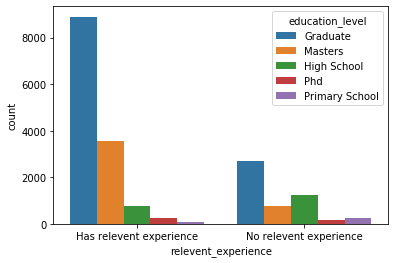

In [8]:
sns.countplot(x=data['relevent_experience'],hue=data.education_level)


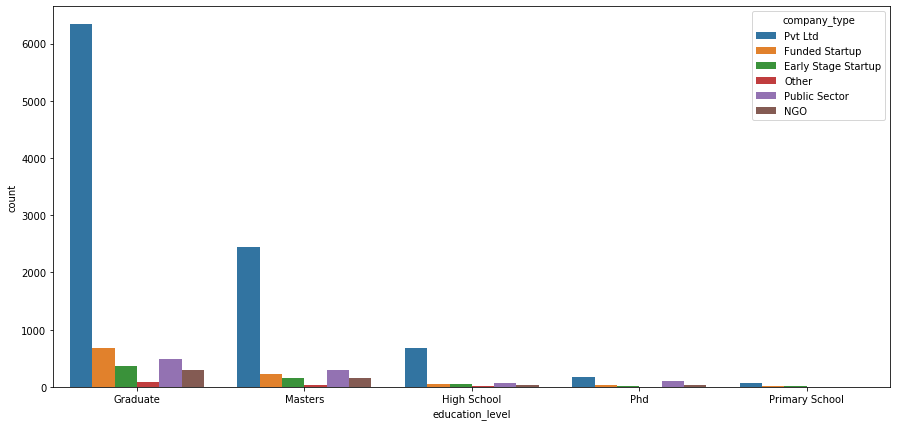

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(x=data['education_level'],hue=data.company_type)

#### Some insights from the EDA
-->The target variable is highly imbalanced.The data contains more number of people not looking for job change and very less number for looking for a job change.

-->Majority of the people having relevent experience and not having relevent experience are not willing to enroll in university.Next majority of people with no relevent experience are opting for full time enrollment.

--> Majority is graduates who are working for various company_types when compared to other education level.

### Handling of missing values

In [10]:
### Checking for missing values
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
### filling the nan values with most frequently occuring value
data['gender']=data['gender'].fillna(data['gender'].mode()[0])
data['enrolled_university']=data['enrolled_university'].fillna(data['enrolled_university'].mode()[0])
data['education_level']=data['education_level'].fillna(data['education_level'].mode()[0])
data['major_discipline']=data['major_discipline'].fillna(data['major_discipline'].mode()[0])
data['company_size']=data['company_size'].fillna(data['company_size'].mode()[0])
data['company_type']=data['company_type'].fillna(data['company_type'].mode()[0])
data['last_new_job']=data['last_new_job'].fillna(data['last_new_job'].mode()[0])
data['experience']=data['experience'].fillna(data['experience'].mode()[0])

In [12]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### Data Preprocessing

#### There are some categorical values which can be encoded as numbers, so we will take a look at unique values present as categories and convert these fields as numeric

In [13]:
print("gender: ",data.gender.unique())
print("major_discipline: ",data.major_discipline.unique())
print("education_level: ",data.education_level.unique() )
print('relevent_experience: ',data.relevent_experience.unique())
print("enrolled_university: ",data.enrolled_university.unique())
print('company_type: ',data.company_type.unique())
print('company_size: ',data.company_size.unique())
print('last_new_job:',data.last_new_job.unique())

gender:  ['Male' 'Female' 'Other']
major_discipline:  ['STEM' 'Business Degree' 'Arts' 'Humanities' 'No Major' 'Other']
education_level:  ['Graduate' 'Masters' 'High School' 'Phd' 'Primary School']
relevent_experience:  ['Has relevent experience' 'No relevent experience']
enrolled_university:  ['no_enrollment' 'Full time course' 'Part time course']
company_type:  ['Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other' 'Public Sector'
 'NGO']
company_size:  ['50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
last_new_job: ['1' '>4' 'never' '4' '3' '2']


In [14]:
# new data frame with split value columns 
new = data["city"].str.split("_", n = 1, expand = True) 
  
# making separate column from new data frame 
data["city_new"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["city"], inplace = True) 
  
# df display 
#data.head()

In [15]:
### In the company_size attribute we have 8 unique values.So numbering has been done based on the range of company_size.
### For example : <10 company_size has given a rank as 0 and 10000+ company_size has given a rank of 7 .
data['company_size']=data['company_size'].replace(['50-99', '<10', '10000+' ,'5000-9999', '1000-4999' ,'10/49', '100-500',
 '500-999'], [2,0,7,6,5,1,3,4])

In [16]:
### Gender attribute has 3 uniques values for which numbering is given.
data['gender']=data['gender'].replace(['Male','Female','Other'], [1,2,3])

In [17]:
### Relevent_exp attribute has only 2 unique values .So if he/she has experience then it is given as 1 else 0.
data['relevent_experience']=data['relevent_experience'].replace(['Has relevent experience','No relevent experience'],[1,0])

In [18]:
# Based on course type numbering is done.
data['enrolled_university']=data['enrolled_university'].replace(['no_enrollment','Full time course','Part time course'], 
                                                                [0,2,1])

In [19]:
### Based on the level of education rank is given i.e, higher education higher the value.
data['education_level']=data['education_level'].replace(['Masters','Graduate','High School','Primary School','Phd'],
                                                        [4,3,2,1,5])

In [20]:
### Since the attributes major_discipline and company_type cannot be numbered randomly because of their individual importance
### Here we are using get dummies method for those attributes.
major_discipline=pd.get_dummies(data.major_discipline,drop_first=True)
company_type=pd.get_dummies(data.company_type,drop_first=True)

data_new=pd.concat([data,major_discipline],axis=1)
data_new=pd.concat([data,company_type],axis=1)

In [21]:
data=data_new.drop(['major_discipline','company_type'],axis=1)

In [22]:
### Converting the >20 and <1 years of experience records to 20 and 1
data['experience']=data['experience'].replace(['>20','<1'], [20,1])

In [23]:
### latest new job we have '1' '>4' 'never' '4' '3' '2' 
data['last_new_job']=data['last_new_job'].replace(['>4','never'],[5,0])

#### Final Train Data

In [24]:
train_data=data.copy()
train_data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,city_new,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
0,8949,0.920,1,1,0,3,20,2,1,36,1.0,103,0,0,0,0,1
1,29725,0.776,1,0,0,3,15,2,5,47,0.0,40,0,0,0,0,1
2,11561,0.624,1,0,2,3,5,2,0,83,0.0,21,0,0,0,0,1
3,33241,0.789,1,0,0,3,1,2,0,52,1.0,115,0,0,0,0,1
4,666,0.767,1,1,0,4,20,2,4,8,0.0,162,1,0,0,0,0


####  Test data

In [25]:
test_data=pd.read_csv('aug_test.csv')

In [26]:
### filling the nan values with most frequently occuring value
test_data['gender']=test_data['gender'].fillna(data['gender'].mode()[0])
test_data['enrolled_university']=test_data['enrolled_university'].fillna(test_data['enrolled_university'].mode()[0])
test_data['education_level']=test_data['education_level'].fillna(test_data['education_level'].mode()[0])
test_data['major_discipline']=test_data['major_discipline'].fillna(test_data['major_discipline'].mode()[0])
test_data['company_size']=test_data['company_size'].fillna(test_data['company_size'].mode()[0])
test_data['company_type']=test_data['company_type'].fillna(test_data['company_type'].mode()[0])
test_data['last_new_job']=test_data['last_new_job'].fillna(test_data['last_new_job'].mode()[0])
test_data['experience']=test_data['experience'].fillna(test_data['experience'].mode()[0])

#### Preprocessing of the test data

In [27]:
# new data frame with split value columns 
new_test = test_data["city"].str.split("_", n = 1, expand = True) 
  # making separate column from new data frame 
test_data["city_new"]= new_test[1] 
  # Dropping old Name columns 
test_data.drop(columns =["city"], inplace = True) 

### Now Preprocessing the test data  
    
test_data['company_size']=test_data['company_size'].replace(['50-99', '<10', '10000+' ,'5000-9999', '1000-4999' ,'10/49', '100-500',
 '500-999'], [2,0,7,6,5,1,3,4])
test_data['gender']=test_data['gender'].replace(['Male','Female','Other'], [1,2,3])
test_data['relevent_experience']=test_data['relevent_experience'].replace(['Has relevent experience','No relevent experience'],[1,0])
test_data['enrolled_university']=test_data['enrolled_university'].replace(['no_enrollment','Full time course','Part time course'], 
                                                                [0,2,1])
test_data['education_level']=test_data['education_level'].replace(['Masters','Graduate','High School','Primary School','Phd'],
                                                        [4,3,2,1,5])

major_discipline=pd.get_dummies(test_data.major_discipline,drop_first=True)
company_type=pd.get_dummies(test_data.company_type,drop_first=True)



test_data_new=pd.concat([test_data,major_discipline],axis=1)
test_data_new=pd.concat([test_data,company_type],axis=1)

test_data=test_data_new.drop(['major_discipline','company_type'],axis=1)

test_data['experience']=test_data['experience'].replace(['>20','<1'], [20,1])
test_data['last_new_job']=test_data['last_new_job'].replace(['>4','never'],[5,0])



In [28]:
test_data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,city_new,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
0,32403,0.827,1,1,2,3,9,0,1,21,41,0,0,0,0,1
1,9858,0.920,2,1,0,3,5,2,1,98,103,0,0,0,0,1
2,31806,0.624,1,0,0,2,1,2,0,15,21,0,0,0,0,1
3,27385,0.827,1,1,0,4,11,1,1,39,13,0,0,0,0,1
4,27724,0.920,1,1,0,3,20,7,5,72,103,0,0,0,0,1


####  Splitting of train and test data

In [29]:
X=train_data.loc[:, train_data.columns != 'target']
Y=train_data['target']

In [30]:
seed=100
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=seed)

#### Since the attributes is of different scales we need to do normalization/stardization of the data

In [31]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train= sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

#### Logistics regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [33]:
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression(random_state=100,class_weight='balanced') ## Since the default credit  is imbalanced we took class_weigth has balanced.
clf1.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced', random_state=100)

In [34]:
y_pred_lr=clf1.predict(X_test)
y_pred_train=clf1.predict(X_train)

In [35]:
from sklearn.metrics import confusion_matrix
con1=confusion_matrix(Y_test,y_pred_lr)
print("Confusion Matrix:",con1)

Confusion Matrix: [[3183 1108]
 [ 529  928]]


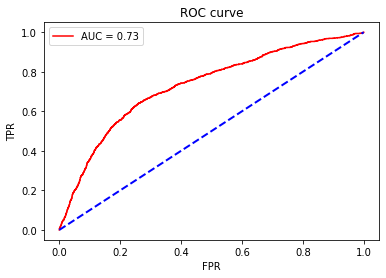

In [36]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = clf1.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score,roc_auc_score
from sklearn.metrics import accuracy_score
print("Accuracy of test data: %.3f"%accuracy_score(Y_test,y_pred_lr))
print("Accuracy of train data: %.3f"%accuracy_score(Y_train,y_pred_train))

print()

precision = precision_score(Y_test, y_pred_lr)
print('Precision: %.3f' % precision)

recall = recall_score(Y_test, y_pred_lr)
print('Recall: %.3f' % recall)


score = f1_score(Y_test, y_pred_lr)
print('F1 Score: %.3f' % score)


roc=roc_auc_score(Y_test, y_pred_lr)
print('ROC : %.3f'%roc)

Accuracy of test data: 0.715
Accuracy of train data: 0.711

Precision: 0.456
Recall: 0.637
F1 Score: 0.531
ROC : 0.689


#### Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=8,min_samples_leaf=45,n_estimators = 120,class_weight='balanced', random_state = 42)
# Train the model on training data
rf.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=45, n_estimators=120, random_state=42)

In [39]:
y_pred_rf=rf.predict(X_test)
y_pred_train_rf=rf.predict(X_train)

In [40]:
con3=confusion_matrix(Y_test,y_pred_rf)
print("Confusion matrix:",con3)

Confusion matrix: [[3358  933]
 [ 457 1000]]


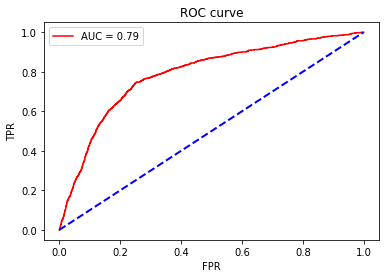

In [41]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve, roc_auc_score, auc
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
print('Accuracy of test data:%.3f'%accuracy_score(Y_test,y_pred_rf))
print('Accuracy of train data:%.3f'%accuracy_score(Y_train,y_pred_train_rf))

print()
roc_rf=roc_auc_score(Y_test,y_pred_rf)
print("ROC:%.3f"%roc_rf)

Accuracy of test data:0.758
Accuracy of train data:0.770

ROC:0.734


In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      4291
         1.0       0.52      0.69      0.59      1457

    accuracy                           0.76      5748
   macro avg       0.70      0.73      0.71      5748
weighted avg       0.79      0.76      0.77      5748



#### Explanation: After applying logistics regression we got AUC as 0.73 and ROC as 0.68.After applying random forest the AUC and ROC are 0.79 and 0.73 which has been increased when compared to logistic regression.Even though its a good score but since the data is highly imbalanced so we try with some other models for getting better accuracy.

In [44]:
print("Count of Not looking for job change:",data.target.value_counts()[0])
print("Count of Looking for a job change:",data.target.value_counts()[1] )     

Count of Not looking for job change: 14381
Count of Looking for a job change: 4777


#### Since the target varibale is highly imbalanced we need to apply SMOTE or Near Miss methods

Smote (synthetic minority oversampling technique)
It is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them

In [45]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [46]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_res,y_res = sm.fit_sample(X_train, Y_train) 

In [47]:
print("The shape of data before oversampling: ",X_train.shape)
print("The shape of data after oversampling: ",X_res.shape)

The shape of data before oversampling:  (13410, 16)
The shape of data after oversampling:  (20180, 16)


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=45)
rf.fit(X_res,y_res)

RandomForestClassifier(max_depth=10, min_samples_leaf=45, n_estimators=300)

In [49]:
from sklearn.metrics import confusion_matrix
pred_rf_test=rf.predict(X_test)
cm=confusion_matrix(Y_test,pred_rf_test)
print(cm)

[[1800 2491]
 [ 189 1268]]


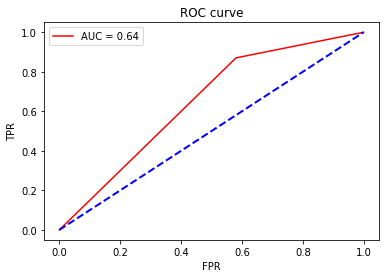

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(Y_test, pred_rf_test, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(Y_test,pred_rf_test))
print(classification_report(Y_test,pred_rf_test))

0.5337508698677801
              precision    recall  f1-score   support

         0.0       0.90      0.42      0.57      4291
         1.0       0.34      0.87      0.49      1457

    accuracy                           0.53      5748
   macro avg       0.62      0.64      0.53      5748
weighted avg       0.76      0.53      0.55      5748



#### Under sampling technique:The NearMiss Algorithm has undersampled the majority instances and made it equal to minority class. Here, the majority class has been reduced to the total number of minority class, so that both classes will have equal number of records.

In [52]:
from imblearn.under_sampling import NearMiss
under=NearMiss()
X_under,y_under=under.fit_sample(X_train,Y_train)

In [53]:
print("The shape of data before undersampling: ",X_train.shape)
print("The shape of data after underampling: ",X_under.shape)

The shape of data before undersampling:  (13410, 16)
The shape of data after underampling:  (6640, 16)


In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,max_depth=9,min_samples_leaf=45)
rf.fit(X_under,y_under)

RandomForestClassifier(max_depth=9, min_samples_leaf=45, n_estimators=300)

In [55]:
from sklearn.metrics import confusion_matrix
pred_rf_test=rf.predict(X_test)
cm=confusion_matrix(Y_test,pred_rf_test)
print(cm)

[[1977 2314]
 [ 297 1160]]


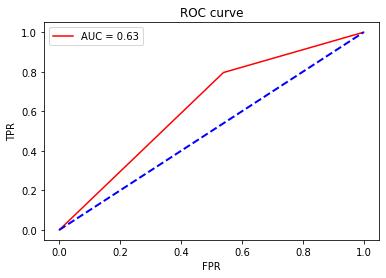

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, threshold = roc_curve(Y_test, pred_rf_test, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(accuracy_score(Y_test,pred_rf_test))
print(classification_report(Y_test,pred_rf_test))

0.5457550452331246
              precision    recall  f1-score   support

         0.0       0.87      0.46      0.60      4291
         1.0       0.33      0.80      0.47      1457

    accuracy                           0.55      5748
   macro avg       0.60      0.63      0.54      5748
weighted avg       0.73      0.55      0.57      5748



#### CONCLUSION: We tried applying SMOTE and Near Miss techniques which we usually use when there is class imbalance.But those techniques were not working that great on our data. So we can conclude that Random forest Classifier is able to make better predictions when compared to other techniques and also it is taking class_weight as balanced.Hence it is also solving the issue of imbalanced classes.
#### Random Forest is giving ROC as 0.73 and AUC as 0.79

### Test Data

In [61]:
test_data.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,city_new,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
0,32403,0.827,1,1,2,3,9,0,1,21,41,0,0,0,0,1
1,9858,0.920,2,1,0,3,5,2,1,98,103,0,0,0,0,1
2,31806,0.624,1,0,0,2,1,2,0,15,21,0,0,0,0,1
3,27385,0.827,1,1,0,4,11,1,1,39,13,0,0,0,0,1
4,27724,0.920,1,1,0,3,20,7,5,72,103,0,0,0,0,1


### Predict the probability of a candidate will work for the company

In [59]:
y_test_predict = rf.predict_proba(test_data)

In [60]:
for i in range(len(test_data)):
    print("X=%s,Probability=%s" % (test_data['enrollee_id'][i], y_test_predict[i][0]))

X=32403,Probability=0.37330944187242243
X=9858,Probability=0.3992855818718743
X=31806,Probability=0.4697941434368847
X=27385,Probability=0.5425970961276428
X=27724,Probability=0.5528503330977105
X=217,Probability=0.36574054855791177
X=21465,Probability=0.46429521827199455
X=27302,Probability=0.4091485975525342
X=12994,Probability=0.5564875015995635
X=16287,Probability=0.31302749786197215
X=10856,Probability=0.5528503330977105
X=9272,Probability=0.49312306617574714
X=14249,Probability=0.5006916583038893
X=24372,Probability=0.5425473688965173
X=14070,Probability=0.5491925232488964
X=24914,Probability=0.31302749786197215
X=7865,Probability=0.46394537484383086
X=7463,Probability=0.5445673828087346
X=21514,Probability=0.48496934418911164
X=29033,Probability=0.3246628490124782
X=15359,Probability=0.377914798448293
X=16001,Probability=0.5425473688965173
X=25202,Probability=0.48496934418911164
X=5058,Probability=0.35900232104206753
X=23570,Probability=0.49477114902659197
X=19139,Probability=0.

X=3413,Probability=0.36408651440750456
X=33234,Probability=0.5412496725099536
X=13314,Probability=0.46394537484383086
X=30921,Probability=0.5619004250628251
X=17072,Probability=0.5528503330977105
X=31230,Probability=0.46394537484383086
X=6689,Probability=0.49513131323730003
X=19117,Probability=0.5425473688965173
X=32259,Probability=0.5425473688965173
X=15640,Probability=0.4793524285926399
X=16690,Probability=0.3635470648662202
X=10928,Probability=0.31302749786197215
X=10640,Probability=0.4843244200275615
X=14904,Probability=0.3635470648662202
X=5160,Probability=0.36574054855791177
X=8239,Probability=0.3246628490124782
X=11912,Probability=0.36574054855791177
X=23554,Probability=0.49900283677222146
X=17221,Probability=0.3246628490124782
X=25072,Probability=0.5425473688965173
X=19240,Probability=0.5619004250628251
X=12151,Probability=0.5528503330977105
X=26963,Probability=0.5537158147659419
X=2889,Probability=0.5425473688965173
X=19260,Probability=0.5564875015995635
X=7626,Probability=0.3

X=29908,Probability=0.5528503330977105
X=17426,Probability=0.4826979131846298
X=9806,Probability=0.5542417707413515
X=25886,Probability=0.5537158147659419
X=2736,Probability=0.5537158147659419
X=26688,Probability=0.5619004250628251
X=19261,Probability=0.5528503330977105
X=16728,Probability=0.3762326855300966
X=8837,Probability=0.5528503330977105
X=9345,Probability=0.3992855818718743
X=25696,Probability=0.5425473688965173
X=33236,Probability=0.35327085472298897
X=7258,Probability=0.47434951463124386
X=4274,Probability=0.5517602291666923
X=18287,Probability=0.5528503330977105
X=25062,Probability=0.5528503330977105
X=11144,Probability=0.5515071162850351
X=11404,Probability=0.2911450632198579
X=13232,Probability=0.5528503330977105
X=21968,Probability=0.3353513095744893
X=12142,Probability=0.32786047521779094
X=30796,Probability=0.5515071162850351
X=23735,Probability=0.4622254070863834
X=26679,Probability=0.5619004250628251
X=21726,Probability=0.5445673828087346
X=5171,Probability=0.4616739